In [6]:
import pandas as pd
df = pd.read_csv('2024-07-03 5_11pm.csv')

In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277371 entries, 0 to 277370
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   MKT_BASE_CAMPGN_ID          277371 non-null  int64  
 1   PARENT_MKT_CAMPGN_ID        277371 non-null  int64  
 2   MKT_CAMPGN_ID               277371 non-null  int64  
 3   CAMPGN_NM                   277363 non-null  object 
 4   CAMPGN_SUBJCT_LINE_TXT      245916 non-null  object 
 5   CAMPGN_CELL_NM              226451 non-null  object 
 6   BUSINES_UNIT_NM             181223 non-null  object 
 7   CAMPGN_CATG_CD              179615 non-null  object 
 8   PGM_CAMPGN_NM               181169 non-null  object 
 9   CAMPGN_LANG_NM              178797 non-null  object 
 10  CAMPGN_REGION_CD            178475 non-null  object 
 11  CAMPGN_OFFER_TYPE_CD        175801 non-null  object 
 12  CAMPGN_OFFER_QTY_CD         169181 non-null  object 
 13  CAMPGN_REGSTRT

In [11]:
missing_values = df.isnull().sum()
print(missing_values)

MKT_BASE_CAMPGN_ID                 0
PARENT_MKT_CAMPGN_ID               0
MKT_CAMPGN_ID                      0
CAMPGN_NM                          8
CAMPGN_SUBJCT_LINE_TXT         31455
CAMPGN_CELL_NM                 50920
BUSINES_UNIT_NM                96148
CAMPGN_CATG_CD                 97756
PGM_CAMPGN_NM                  96202
CAMPGN_LANG_NM                 98574
CAMPGN_REGION_CD               98896
CAMPGN_OFFER_TYPE_CD          101570
CAMPGN_OFFER_QTY_CD           108190
CAMPGN_REGSTRTN_REQUIR_IND    102112
CAMPGN_TRIGGER_CD              96150
CAMPGN_CREATE_DT                   5
CAMPGN_AUDIENC_CT              89506
CNTRL_GROUP_IND                    0
CAMPGN_OFFER_NM               186428
SOURCE_DATA_TMS                    0
SF_LOAD_TMS                        0
dtype: int64


In [12]:
unique_languages = df['CAMPGN_LANG_NM'].unique()
num_unique_languages = len(unique_languages)
print(f"Number of different languages: {num_unique_languages}")
print(f"Different languages: {unique_languages}")

Number of different languages: 12
Different languages: ['EN' 'US English' 'LAC Spanish' nan 'Portuguese' 'France' 'Korean'
 'Spain Spanish' 'Chinese' 'Japanese' 'Queens English' 'German']


In [13]:
language_counts = df['CAMPGN_LANG_NM'].value_counts()
print(language_counts)

CAMPGN_LANG_NM
EN                114514
US English         50818
Portuguese          5082
LAC Spanish         5075
France              3054
Spain Spanish         83
Queens English        60
Japanese              37
Korean                36
Chinese               36
German                 2
Name: count, dtype: int64


In [14]:
pip install matplotlib seaborn

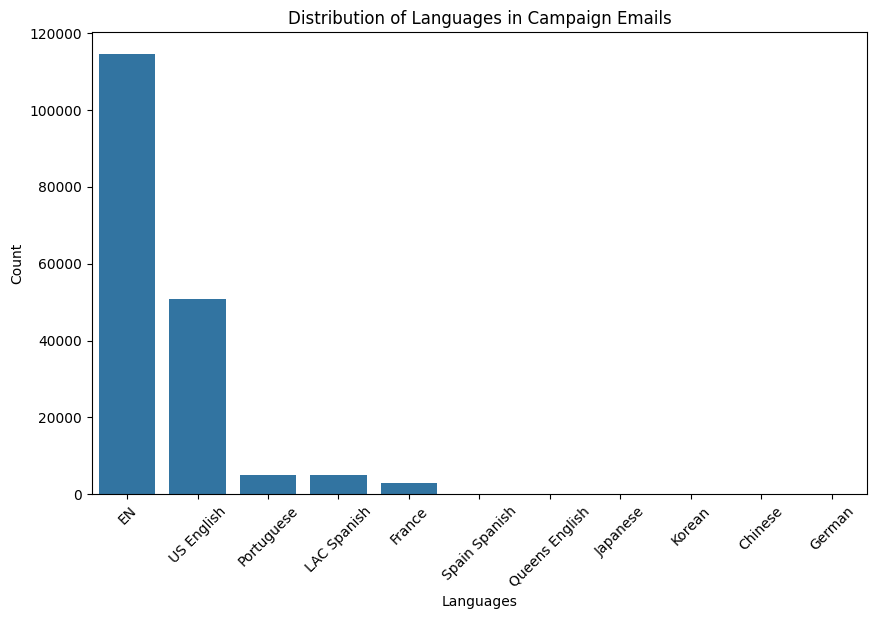

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

language1 = {
    'CAMPGN_LANG_NM': ['EN', 'US English', 'Portuguese', 'LAC Spanish', 'France', 'Spain Spanish',
                       'Queens English', 'Japanese', 'Korean', 'Chinese', 'German'],
    'Count': [114514, 50818, 5082, 5075, 3054, 83, 60, 37, 36, 36, 2]
}
df1 = pd.DataFrame(language1)

language_counts1 = df1.set_index('CAMPGN_LANG_NM')['Count']


# Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts1.index, y=language_counts1.values)
plt.title('Distribution of Languages in Campaign Emails')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
region_counts = df['CAMPGN_REGION_CD'].value_counts()
print(region_counts)

CAMPGN_REGION_CD
All regions       96098
US Domestic       60550
Latin America     11597
Region             6104
Canada             3833
Asia Pacific        142
European Union      129
Caribbean            17
EU                    5
Name: count, dtype: int64


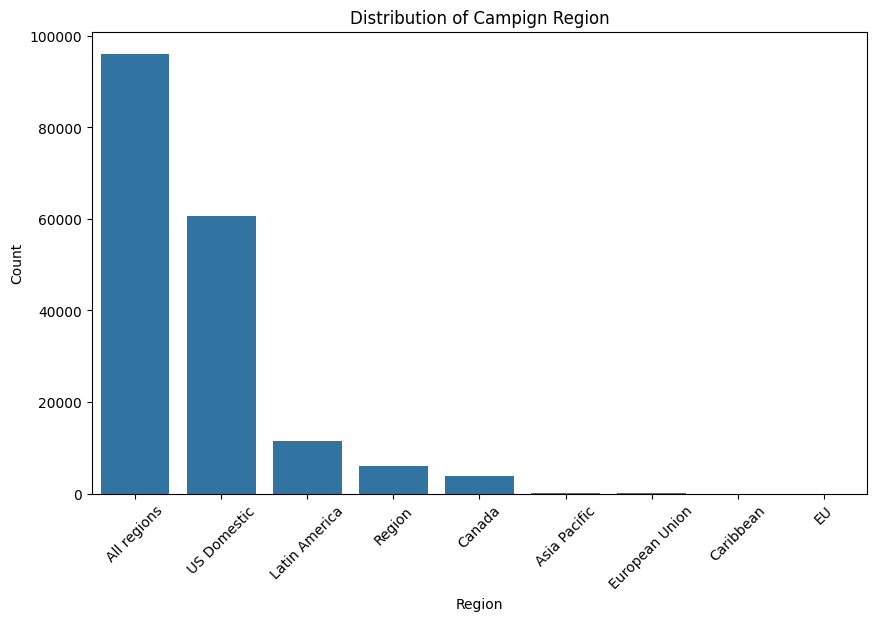

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x= region_counts.index, y=region_counts.values)
plt.title('Distribution of Campign Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [18]:
Campgntype_counts = df['CAMPGN_OFFER_TYPE_CD'].value_counts()
print(Campgntype_counts)

CAMPGN_OFFER_TYPE_CD
acq          50926
miles        42887
upgrade      29714
info         22137
choice       16106
renew         6700
fare sale     6480
multi          851
Name: count, dtype: int64


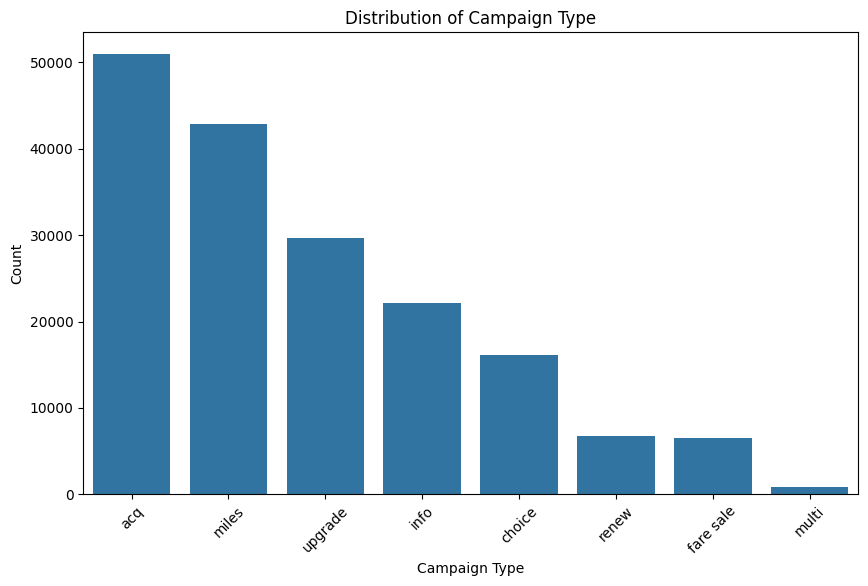

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x= Campgntype_counts.index, y=Campgntype_counts.values)
plt.title('Distribution of Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

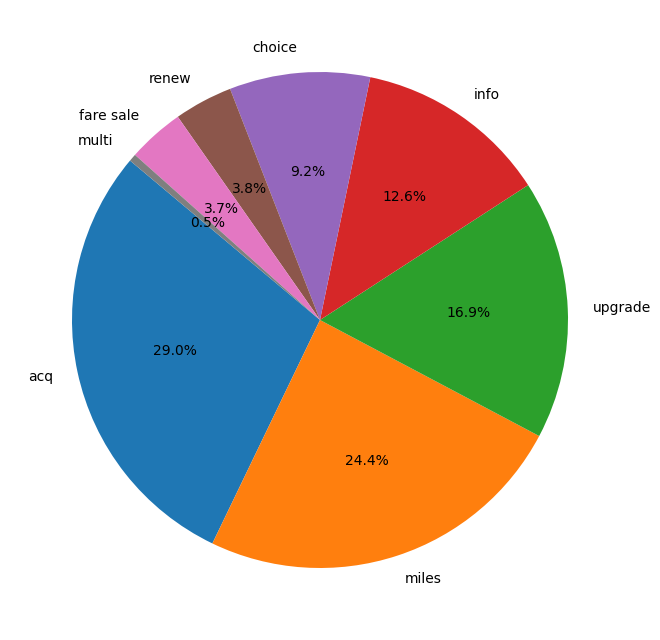

In [ ]:
plt.figure(figsize=(8, 15))
plt.pie(Campgntype_counts.values, labels=Campgntype_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

In [19]:
OfferQTY_counts = df['CAMPGN_OFFER_QTY_CD'].value_counts()
print(OfferQTY_counts)

CAMPGN_OFFER_QTY_CD
single    100606
multi      68575
Name: count, dtype: int64


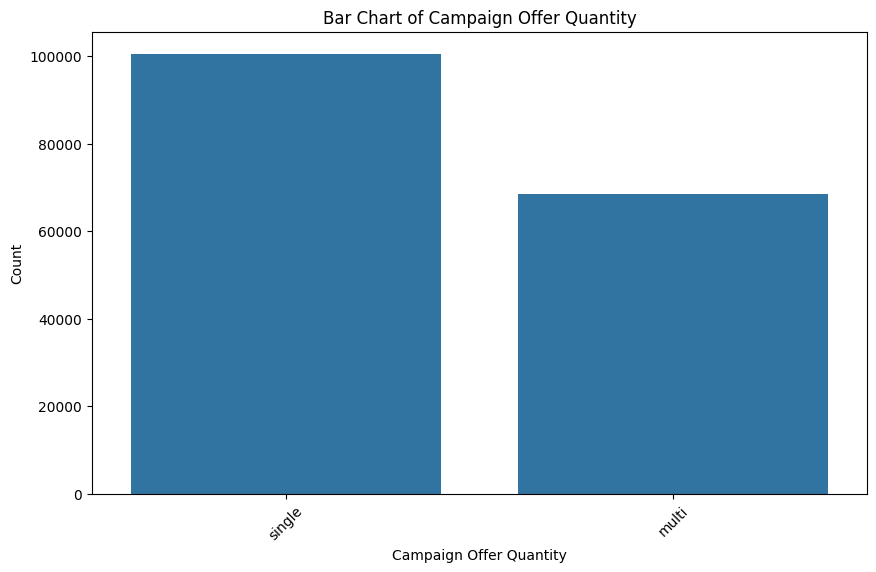

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x= OfferQTY_counts.index, y=OfferQTY_counts.values)
plt.title('Bar Chart of Campaign Offer Quantity')
plt.xlabel('Campaign Offer Quantity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
mean_audience_per_category = df.groupby('CAMPGN_OFFER_TYPE_CD')['CAMPGN_AUDIENC_CT'].mean()
print(mean_audience_per_category)

CAMPGN_OFFER_TYPE_CD
acq          1.578071e+06
choice       6.930378e+05
fare sale    7.461384e+05
info         2.677657e+06
miles        1.092154e+06
multi        9.624846e+06
renew        1.205813e+04
upgrade      4.257436e+05
Name: CAMPGN_AUDIENC_CT, dtype: float64


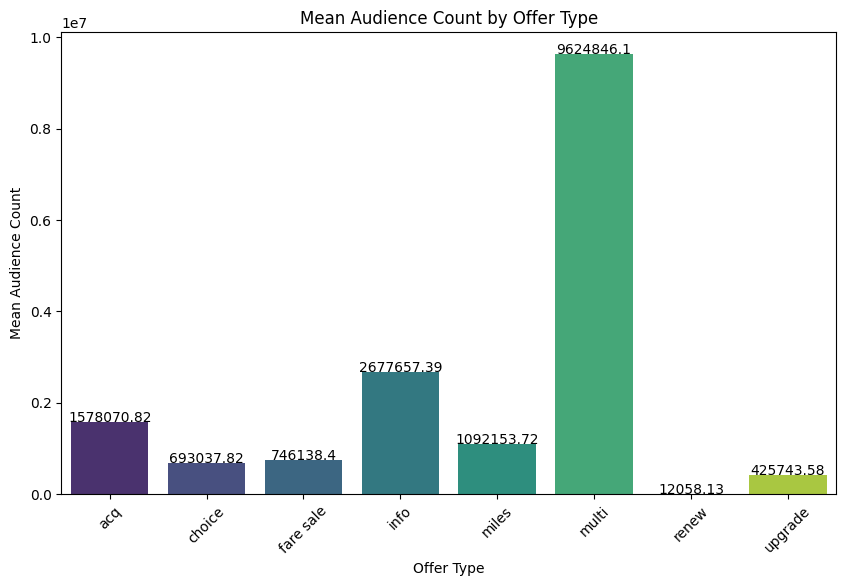

In [22]:
mean_audience_per_category = df.groupby('CAMPGN_OFFER_TYPE_CD')['CAMPGN_AUDIENC_CT'].mean().reset_index()
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='CAMPGN_OFFER_TYPE_CD', y='CAMPGN_AUDIENC_CT', data=mean_audience_per_category, palette='viridis')

for index, row in mean_audience_per_category.iterrows():
    barplot.text(row.name, row.CAMPGN_AUDIENC_CT, round(row.CAMPGN_AUDIENC_CT, 2), color='black', ha="center")

plt.title('Mean Audience Count by Offer Type')
plt.xlabel('Offer Type')
plt.ylabel('Mean Audience Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
us_domestic_df = df[df['CAMPGN_REGION_CD'] == 'US Domestic']
# Calculate the distribution of campaign offer types
campaign_offer_distribution = us_domestic_df['CAMPGN_OFFER_TYPE_CD'].value_counts()
# Display the distribution
print(campaign_offer_distribution)

CAMPGN_OFFER_TYPE_CD
upgrade      20093
miles        10195
choice        8571
acq           8428
fare sale     6475
info          2698
multi          845
Name: count, dtype: int64


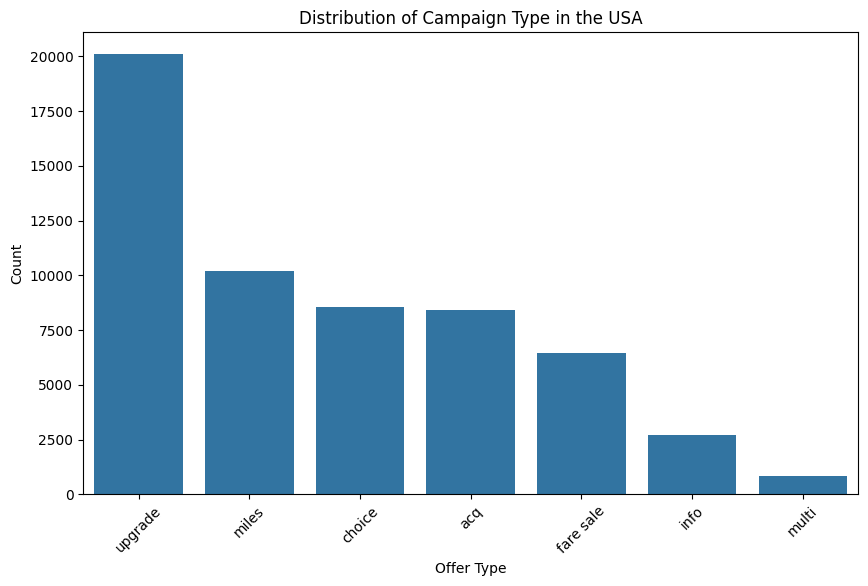

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x= campaign_offer_distribution.index, y=campaign_offer_distribution.values)
plt.title('Distribution of Campaign Type in the USA')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Ensure 'CAMPGN_AUDIENC_CT' is numeric
df['CAMPGN_AUDIENC_CT'] = pd.to_numeric(df['CAMPGN_AUDIENC_CT'], errors='coerce')
# Group by 'CAMPGN_OFFER_TYPE_CD' and sum the 'CAMPGN_AUDIENC_CT'
audience_sum_by_offer_type = df.groupby('CAMPGN_OFFER_TYPE_CD')['CAMPGN_AUDIENC_CT'].sum()
# Display the result
print(audience_sum_by_offer_type)

CAMPGN_OFFER_TYPE_CD
acq          3.599895e+10
choice       1.103871e+10
fare sale    4.834977e+09
info         5.621474e+10
miles        4.534513e+10
multi        8.190744e+09
renew        8.076535e+07
upgrade      1.226610e+10
Name: CAMPGN_AUDIENC_CT, dtype: float64


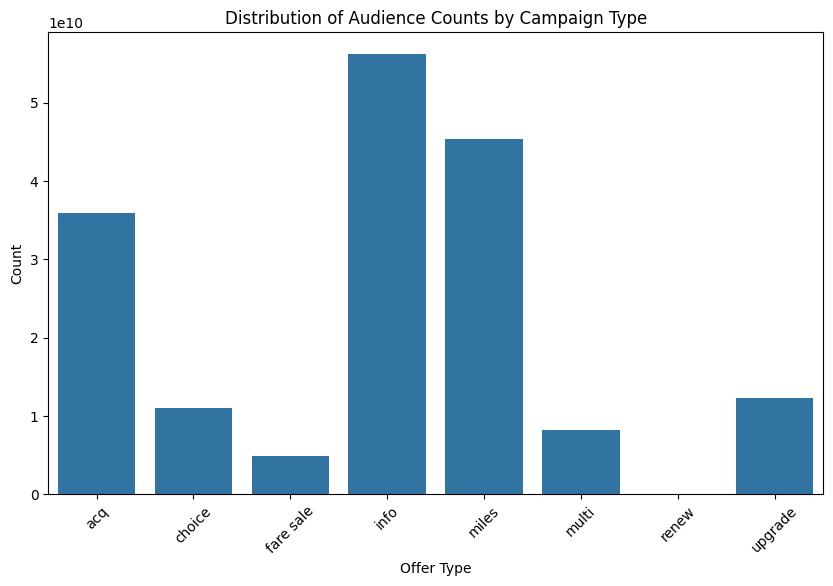

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x= audience_sum_by_offer_type.index, y=audience_sum_by_offer_type.values)
plt.title('Distribution of Audience Counts by Campaign Type')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
df['CAMPGN_AUDIENC_CT'] = pd.to_numeric(df['CAMPGN_AUDIENC_CT'], errors='coerce')
# Filter the dataset for US Domestic region
us_domestic_df = df[df['CAMPGN_REGION_CD'] == 'US Domestic']
# Group by 'CAMPGN_OFFER_TYPE_CD' and sum the 'CAMPGN_AUDIENC_CT'
audience_sum_by_offer_type_us = us_domestic_df.groupby('CAMPGN_OFFER_TYPE_CD')['CAMPGN_AUDIENC_CT'].sum()
# Display the result
print(audience_sum_by_offer_type_us)

CAMPGN_OFFER_TYPE_CD
acq          2.911416e+10
choice       9.840924e+09
fare sale    4.834874e+09
info         2.137780e+09
miles        1.626885e+10
multi        8.188929e+09
upgrade      1.214331e+10
Name: CAMPGN_AUDIENC_CT, dtype: float64


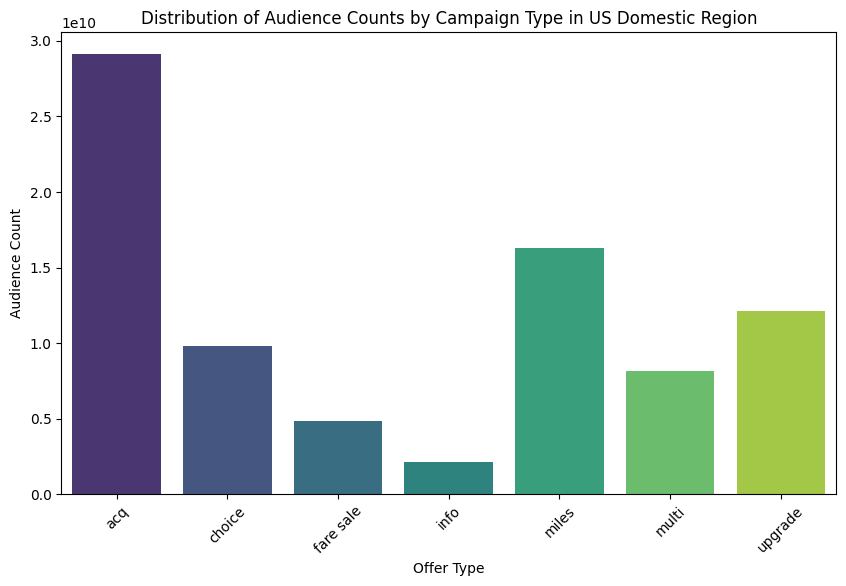

In [28]:
df['CAMPGN_AUDIENC_CT'] = pd.to_numeric(df['CAMPGN_AUDIENC_CT'], errors='coerce')
us_domestic_df = df[df['CAMPGN_REGION_CD'] == 'US Domestic']
audience_sum_by_offer_type_us = us_domestic_df.groupby('CAMPGN_OFFER_TYPE_CD')['CAMPGN_AUDIENC_CT'].sum().reset_index()

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='CAMPGN_OFFER_TYPE_CD', y='CAMPGN_AUDIENC_CT', data=audience_sum_by_offer_type_us, palette='viridis')
plt.title('Distribution of Audience Counts by Campaign Type in US Domestic Region')
plt.xlabel('Offer Type')
plt.ylabel('Audience Count')
plt.xticks(rotation=45)

plt.show()

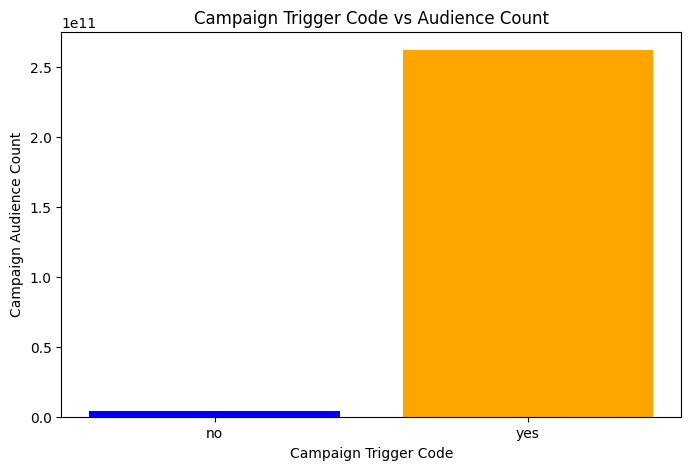

In [29]:
df = df[df['CAMPGN_TRIGGER_CD'].isin(['yes', 'no'])]

# Group by CAMPGN_TRIGGER_CD and sum CAMPGN_AUDIENC_CT
grouped_data = df.groupby('CAMPGN_TRIGGER_CD')['CAMPGN_AUDIENC_CT'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(grouped_data['CAMPGN_TRIGGER_CD'], grouped_data['CAMPGN_AUDIENC_CT'], color=['blue', 'orange'])
plt.xlabel('Campaign Trigger Code')
plt.ylabel('Campaign Audience Count')
plt.title('Campaign Trigger Code vs Audience Count')
plt.show()

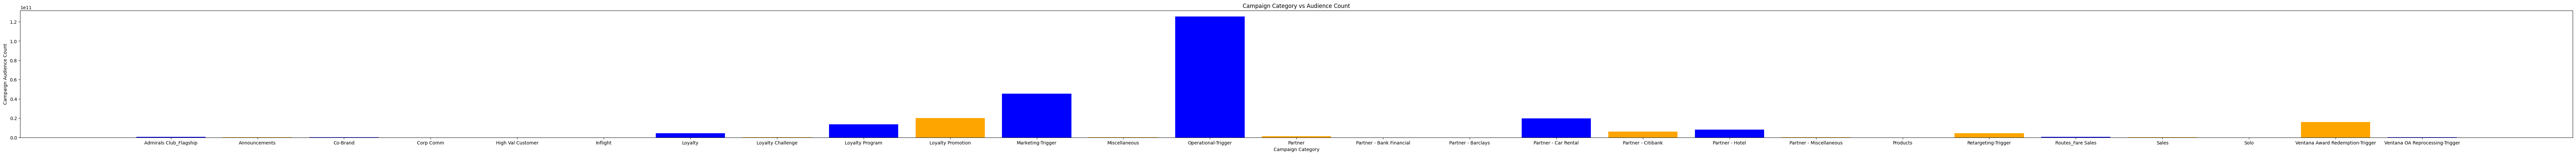

In [30]:
grouped_data = df.groupby('CAMPGN_CATG_CD')['CAMPGN_AUDIENC_CT'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(100, 5))
plt.bar(grouped_data['CAMPGN_CATG_CD'], grouped_data['CAMPGN_AUDIENC_CT'], color=['blue', 'orange'])
plt.xlabel('Campaign Category')
plt.ylabel('Campaign Audience Count')
plt.title('Campaign Category vs Audience Count')
plt.show()

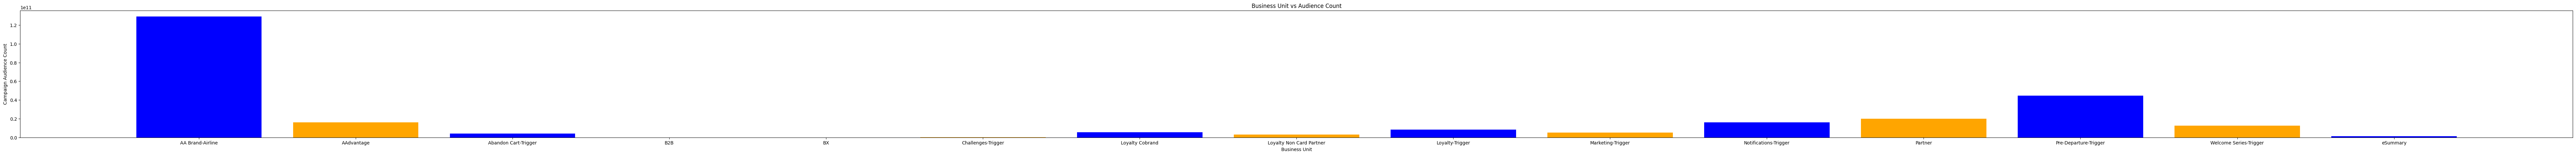

In [31]:
grouped_data = df.groupby('BUSINES_UNIT_NM')['CAMPGN_AUDIENC_CT'].sum().reset_index()

plt.figure(figsize=(100, 5))
plt.bar(grouped_data['BUSINES_UNIT_NM'], grouped_data['CAMPGN_AUDIENC_CT'], color=['blue', 'orange'])
plt.xlabel('Business Unit')
plt.ylabel('Campaign Audience Count')
plt.title('Business Unit vs Audience Count')
plt.show()

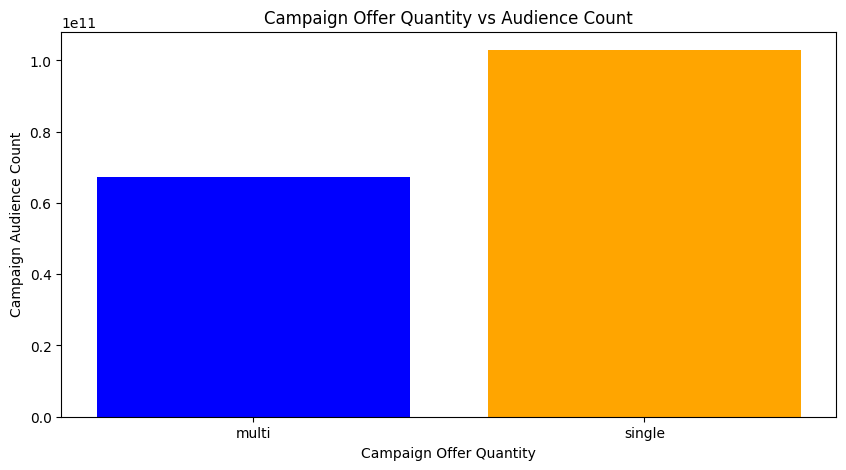

In [ ]:
grouped_data = df.groupby('CAMPGN_OFFER_QTY_CD')['CAMPGN_AUDIENC_CT'].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(grouped_data['CAMPGN_OFFER_QTY_CD'], grouped_data['CAMPGN_AUDIENC_CT'], color=['blue', 'orange'])
plt.xlabel('Campaign Offer Quantity')
plt.ylabel('Campaign Audience Count')
plt.title('Campaign Offer Quantity vs Audience Count')
plt.show()

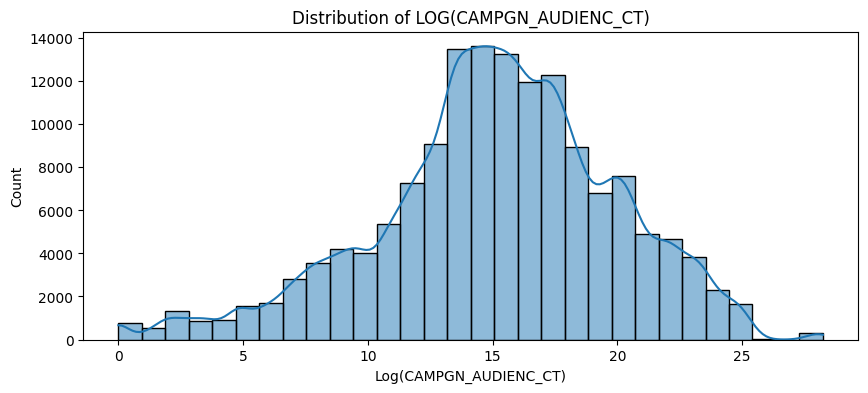

In [32]:
import numpy as np
plt.figure(figsize=(10, 4))
sns.histplot(np.log2(df['CAMPGN_AUDIENC_CT']), kde=True, bins=30)
plt.title(f'Distribution of LOG(CAMPGN_AUDIENC_CT)')
plt.xlabel('Log(CAMPGN_AUDIENC_CT)')
plt.show()

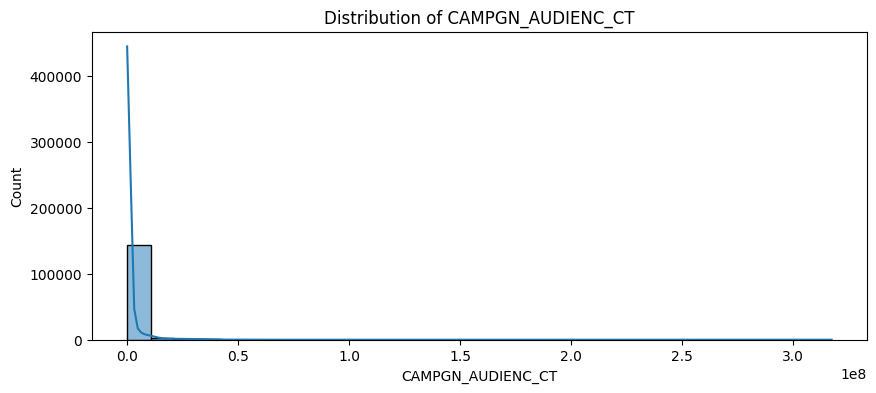

In [33]:
plt.figure(figsize=(10, 4))
sns.histplot((df['CAMPGN_AUDIENC_CT']), kde=True, bins=30)
plt.title(f'Distribution of CAMPGN_AUDIENC_CT')
plt.xlabel('CAMPGN_AUDIENC_CT')
plt.show()

In [10]:
pip install phrasemachine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for phrasemachine: filename=phrasemachine-1.0.7-py3-none-any.whl size=2694854 sha256=f1fd0662f63ed4846632f5a6fcce72ec3dfc0ff13b900f294e1b8efbcd5d5ca1
  Stored in directory: /root/.cache/pip/wheels/84/b3/4d/e849568396756266ef3ae974fc5ab86965f706deffd8e74973
Successfully built phrasemachine


In [34]:
import re,string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE

from gensim.models import Word2Vec,LdaMulticore, TfidfModel
from gensim import corpora
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


import pandas as pd
import os
import numpy as np
import phrasemachine
import re
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
import gensim

In [35]:
pip install rake_nltk

In [36]:
from rake_nltk import Rake

In [37]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [38]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))

In [39]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(text))
    # Convert to lowercase
    text = text.lower()
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    text = re.sub(r'\{[^}]*\}', '', text)
    text = re.sub(r'\{[^}]*\}', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([w for w in word_tokens if not w in stop_words])

    stemmer=PorterStemmer()
    word_list = nltk.word_tokenize(text)
    output = ' '.join([stemmer.stem(w) for w in word_list])

    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return text

In [52]:
filtered_df = df[df['CAMPGN_LANG_NM'].isin(['EN', 'US English', 'Queens English'])]

In [53]:
df['processed_text'] = filtered_df['CAMPGN_SUBJCT_LINE_TXT'].apply(preprocess_text)

In [54]:
print(df['processed_text'].head(20))

0     purchase upgrade flight nonaadv iu seats lb de...
1                                      esen dyn subject
2                                        ota nonaadv sl
3                            instant status pass update
4     purchase upgrade flight nonaadv iu seats lb de...
5                                      esen dyn subject
6                             claim miles upcoming trip
7     hi first nm aadvantage member forget offer sta...
8     dynamic name lose aem balance n n en us aadvan...
9            forget time renew admirals club membership
10     earned loyalty points toward instant status pass
11    dynamic name comma purchase upgrade flight aad...
12           forget time renew admirals club membership
13                                     esen dyn subject
14         fly american lb friendly destination name sl
15         fly american lb friendly destination name sl
16         fly american lb friendly destination name sl
17                              last chance clai

In [56]:
def extract_keywords(text):

    if not isinstance(text, str):
        return ''

    r = Rake()
    r.extract_keywords_from_text(text)
    return ','.join(r.get_ranked_phrases())

df['keywords'] = df['processed_text'].apply(extract_keywords)

In [58]:
print(df['keywords'].head(30))

0     purchase upgrade flight nonaadv iu seats lb de...
1                                      esen dyn subject
2                                        ota nonaadv sl
3                            instant status pass update
4     purchase upgrade flight nonaadv iu seats lb de...
5                                      esen dyn subject
6                             claim miles upcoming trip
7     hi first nm aadvantage member forget offer sta...
8     dynamic name lose aem balance n n en us aadvan...
9            forget time renew admirals club membership
10     earned loyalty points toward instant status pass
11    dynamic name comma purchase upgrade flight aad...
12           forget time renew admirals club membership
13                                     esen dyn subject
14         fly american lb friendly destination name sl
15         fly american lb friendly destination name sl
16         fly american lb friendly destination name sl
17                              last chance clai

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_tfidf_words(corpus, top_n=100):
    # Initialize the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the corpus to get the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Sum up the TF-IDF scores for each word
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_scores_df = pd.DataFrame({'word': feature_names, 'tfidf': tfidf_scores})

    # Sort the DataFrame by TF-IDF scores in descending order
    sorted_tfidf_df = tfidf_scores_df.sort_values(by='tfidf', ascending=False)

    # Get the top N words
    top_tfidf_words = sorted_tfidf_df.head(top_n)

    return top_tfidf_words

# Assuming df is your DataFrame with the column 'CAMPGN_SUBJCT_LINE_TXT' and 'keywords'
subject_lines = df['processed_text'].dropna().tolist()
keywords = df['keywords'].dropna().tolist()

# Combine subject lines and keywords into a single list for TF-IDF calculation
corpus = subject_lines + keywords

# Get the top 100 TF-IDF words
top_100_tfidf_words = get_top_tfidf_words(corpus, top_n=100)

# Print the top 100 TF-IDF words
print(top_100_tfidf_words.head(30))

            word         tfidf
595           sl  38324.133621
170           db  36905.225506
339      journey  36843.919871
86         boost  36842.157557
133        combo  36842.157557
418          nan  30088.000000
417         name  19309.321576
191      dynamic  16175.336051
351           lb  14547.832809
178  destination  13409.363538
137        comma  12176.401910
1     aadvantage  11491.291832
402        miles  11209.733001
261       flight  10109.160840
333           iu   9440.284551
663     upcoming   9159.158740
666      upgrade   8825.146835
130         club   8653.389274
12      admirals   8653.389274
525     purchase   8476.607457
579        seats   8430.381110
649         trip   8263.964540
611       status   7797.190814
0           aadv   7354.029348
26      american   6759.070975
83         bonus   6645.845776
431      nonaadv   6537.882147
371      loyalty   6392.264932
263          fly   5860.211396
273     friendly   5856.695456


In [46]:
pip install wordcloud

In [47]:
from wordcloud import WordCloud

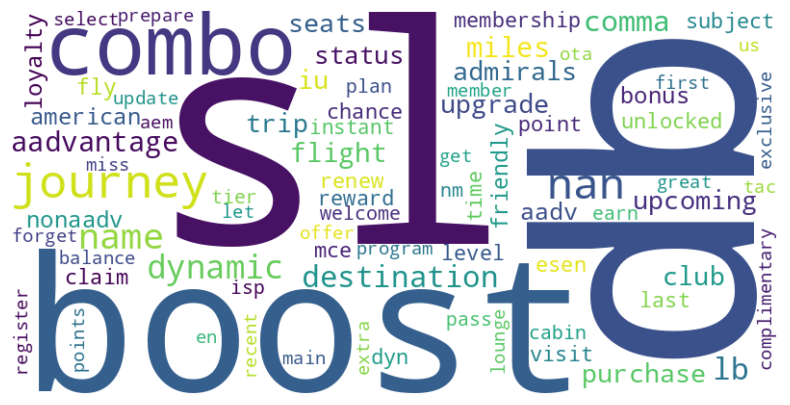

In [70]:
def create_word_cloud(tfidf_df, top_n=50):
    # Get the top N words and their scores
    top_words = tfidf_df.head(top_n)

    # Create a dictionary of words and their TF-IDF scores
    word_scores = dict(zip(top_words['word'], top_words['tfidf']))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine subject lines and keywords into a single list for TF-IDF calculation
corpus = subject_lines + keywords

# Get the top 500 TF-IDF words
top_500_tfidf_words = get_top_tfidf_words(corpus, top_n=500)

# Create and display the word cloud for the top 80 TF-IDF words
create_word_cloud(top_500_tfidf_words, top_n=80)

In [1]:
pip install bertopic

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [106]:
keywords_df = pd.DataFrame({'word': keywords})

In [108]:
keywords_df = keywords_df.head(5000)

In [109]:
# Initialize the BERTopic model
topic_model = BERTopic()

# Convert the DataFrame to a list of strings
documents = keywords_df['word'].tolist()

# Fit the model to the list of words
topics, probabilities = topic_model.fit_transform(documents)

# Print the topics
topic_info = topic_model.get_topic_info()

# Extract the most representative words for each topic
representative_words = {topic_id: topic_model.get_topic(topic_id) for topic_id in topic_info['Topic'].unique() if topic_id != -1}

# Display the topic information
print(topic_info)

# Print representative words for each topic
for topic_id, words in representative_words.items():
    print(f"Topic {topic_id}: {words}")

    Topic  Count                              Name  \
0      -1     15           -1_rental_car_avis_save   
1       0   1974          0_combo_boost_journey_db   
2       1    415                             1____   
3       2    247                          2_nan___   
4       3    134     3_esen_dyn_subject_correction   
..    ...    ...                               ...   
68     67     13      67_dreams_travel_await_comma   
69     68     13        68_every_stay_hotel_points   
70     69     12    69_unlimited_miles_aadvantage_   
71     70     12   70_expect_prepare_american_trip   
72     71     11  71_preselected_apply_offer_enjoy   

                                       Representation  \
0   [rental, car, avis, save, big, budget, future,...   
1           [combo, boost, journey, db, sl, , , , , ]   
2                                [, , , , , , , , , ]   
3                             [nan, , , , , , , , , ]   
4        [esen, dyn, subject, correction, , , , , , ]   
..       

In [73]:
pip install transforms

In [74]:
import pandas as pd
from transformers import pipeline

# Load the pre-trained sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [85]:
pip install ace_tools

In [95]:
keywords_limited = keywords[:1000]

In [96]:
# Perform sentiment analysis
sentiments = sentiment_analyzer(keywords_limited)

# Convert the sentiments to a DataFrame and include the original text
sentiments_df = pd.DataFrame(sentiments)
sentiments_df['text'] = keywords_limited

# Reorder the columns to have the text first
sentiments_df = sentiments_df[['text', 'label', 'score']]


In [97]:
# Display the sentiment results
print(sentiments_df.head(10))

                                                text     label     score
0  purchase upgrade flight nonaadv iu seats lb de...  NEGATIVE  0.978317
1                                   esen dyn subject  POSITIVE  0.981377
2                                     ota nonaadv sl  NEGATIVE  0.999238
3                         instant status pass update  POSITIVE  0.788214
4  purchase upgrade flight nonaadv iu seats lb de...  NEGATIVE  0.978317
5                                   esen dyn subject  POSITIVE  0.981377
6                          claim miles upcoming trip  POSITIVE  0.996070
7  hi first nm aadvantage member forget offer sta...  NEGATIVE  0.997656
8  dynamic name lose aem balance n n en us aadvan...  NEGATIVE  0.998671
9         forget time renew admirals club membership  NEGATIVE  0.982640
